## Notebook to run the validation of the phenomenological trends Section 5.1 of the paper Figure 7 


In [17]:
import numpy as np
from expansion_tools.delay_analysis import gamma_radio_delay_analysis_vs_v_exp
from astropy.table import Table
from astropy.units import Unit as u
import glob
from math import e

In [18]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')

temp_ev_exp=JetTimeEvol.load_model('temp_ev_sim_exp_change_beta_no_synch_cooling/temp_ev_expansion_beta_exp=0.001.pkl')

temp_ev_exp_cooling=JetTimeEvol.load_model('temp_ev_sim_exp_change_beta/temp_ev_expansion_beta_exp=0.001.pkl')


In [19]:
R0=temp_ev_acc_flare.rad_region.jet.parameters.R.val
delta=temp_ev_acc_flare.rad_region.jet.parameters.beam_obj.val
z=temp_ev_acc_flare.rad_region.jet.parameters.z_cosm.val

t_exp_no_cooling=temp_ev_exp.parameters.t_jet_exp.val 
t_exp_cooling=temp_ev_exp_cooling.parameters.t_jet_exp.val
t_exp_corr_d=t_exp_cooling/86400/delta*(1+z)
flare_duration_obs_d=temp_ev_acc_flare.parameters.duration.val/86400/delta*(1+z)
z=temp_ev_acc_flare.rad_region.jet.parameters.z_cosm.val
m_B=temp_ev_exp_cooling.parameters.m_B.val

In [20]:
t_exp_no_cooling

0

In [21]:
def update_sed_plot(p):
    p.sedplot.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1,fontsize=15)
    p.sedplot.xaxis.label.set_size(15)
    p.sedplot.xaxis.set_tick_params(labelsize=15)

    p.secaxy.xaxis.label.set_size(15)
    p.secaxy.xaxis.set_tick_params(labelsize=15)

    p.sedplot.yaxis.label.set_size(15)
    p.sedplot.yaxis.set_tick_params(labelsize=15)
    p.fig.tight_layout()

In [22]:
def eval_phi(p,m_B):
    return (p+4)/(m_B*(p+2)+4)

def delta_t_obs(z,delta,t_exp,beta_exp,R0,nu_0,nu_r,p,m_B):
    
    return (t_exp*(1+z)/delta)+t_peak_obs(z,delta,beta_exp,R0,nu_0,nu_r,p,m_B)

def t_peak_obs(z,delta,beta_exp,R0,nu_0,nu_r,p,m_B):
    psi=(p+4)/(m_B*(p+2)+4)
    a=(R0/(beta_exp*3E10))
    b=(nu_0/nu_r)**(psi)
    return ((1+z)/delta)*(a*(b-1))

def t_decay_obs(z,delta,beta_exp,R0,nu_0,nu_r,p,m_B):
    psi=(p+4)/(m_B*(p+2)+4)
    a=(R0/(m_B*beta_exp*3E10))
    b=(nu_0/nu_r)**(psi)
    return ((1+z)/delta)*(a*b)

def t_rise_obs(z,delta,beta_exp,R0,nu_0,nu_r,p,m_B):
    return t_peak_obs(z,delta,beta_exp,R0,nu_0,nu_r,p,m_B)/2





In [23]:
def tau_p(p):
    return (2/5)*p**(1/3)*np.log(p)

def nu_ssa_to_nu_p(p,nu_ssa):
    return tau_p(p)**(2/(-4-p))*nu_ssa

def nu_p_nu_ssa(p,nu_p):
    return nu_p/(tau_p(p)**(2/(-4-p)))

In [24]:
def delta_t_data(detal_t_conv,flare_duration,tp_gamma,t_exp):
    return detal_t_conv-(flare_duration-tp_gamma)

In [25]:
table_no_synch_cooling=Table.read('temp_ev_analysis_beta_exp_trends_no_synch_cooling/gamma_radio_delay_fit_vs_beta_exp.ecsv')

table_cooling=Table.read('temp_ev_analysis_beta_exp_trends/gamma_radio_delay_fit_vs_beta_exp.ecsv')

In [26]:
nu_0=90E9

In [27]:
def get_theory_times_p(table,nu_obs,nu_0,R0,m_B,p,t_exp,t_exp_corr_d,z,flare_duration_obs_d):

    delta_t_th=np.zeros(len(table))
    t_decay_t_th=np.zeros(len(table))
    t_rise_th=np.zeros(len(table))
    delta_t_data=np.zeros(len(table))
    t_decay_t_data=np.zeros(len(table))
    t_peak_data=np.zeros(len(table))
    
    print('t_exp',t_exp)
    for ID,beta in enumerate(table['beta_exp']):
        delta_t_th[ID]=delta_t_obs(z=z,delta=delta,t_exp=t_exp,beta_exp=beta,R0=R0,nu_0=nu_0,nu_r=nu_obs,p=p,m_B=m_B)/86400+(flare_duration_obs_d-table['t_peak_gamma'][ID])
        delta_t_data =table['delta_T'][ID]
        t_decay_data=table['t_decay_conv'][ID]
        t_peak_data=table['delta_T'][ID]-t_exp-(flare_duration_obs_d-table['t_peak_gamma'][ID])
        t_decay_t_th[ID]=t_decay_obs(z=z,delta=delta,beta_exp=beta,R0=R0,nu_0=nu_0,nu_r=nu_obs,p=p,m_B=m_B)/86400
        t_rise_th[ID]=t_rise_obs(z=z,delta=delta,beta_exp=beta,R0=R0,nu_0=nu_0,nu_r=nu_obs,p=p,m_B=m_B)/86400
        
    return delta_t_th,t_decay_t_th,t_rise_th

In [28]:
p=1.45
delta_t_th_cooling,t_decay_th_cooling,t_rise_th_cooling=get_theory_times_p(table_cooling,nu_obs=15E9,nu_0=nu_0,R0=R0,m_B=m_B,p=p,t_exp=t_exp_cooling,t_exp_corr_d=0,z=z,flare_duration_obs_d=flare_duration_obs_d)
delta_t_th_no_sync_cooling,t_decay_th_no_synch_cooling,t_rise_th_no_synch_cooling=get_theory_times_p(table_no_synch_cooling,nu_obs=15E9,nu_0=nu_0,R0=R0,m_B=m_B,p=p,t_exp=0,t_exp_corr_d=0,z=z,flare_duration_obs_d=flare_duration_obs_d)


t_exp 10000000.0
t_exp 0


1.2296319423908773


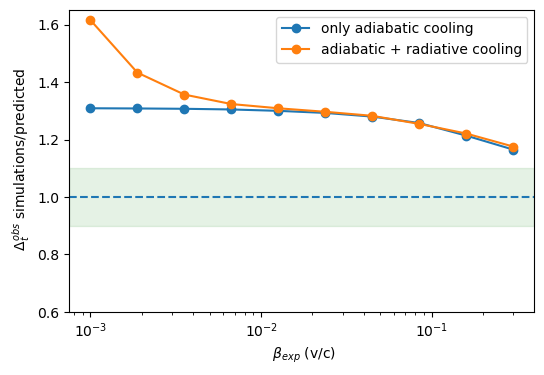

In [33]:
fig_delay=plt.figure(dpi=100)
plt.plot(table_no_synch_cooling['beta_exp'],delta_t_th_no_sync_cooling/(table_no_synch_cooling['delta_T']),'-o',label='only adiabatic cooling')
plt.plot(table_cooling['beta_exp'],(delta_t_th_cooling-t_exp_corr_d)/(table_cooling['delta_T']-t_exp_corr_d),'-o',label='adiabatic + radiative cooling')
plt.axhline(1.0,ls='--')
plt.axhspan(0.9,1.1, alpha=0.1, color='g')
plt.xlabel(r' $\beta_{exp}$ (v/c)')
plt.ylabel(' $\Delta_t^{obs}$ simulations/predicted')
plt.semilogx()
plt.ylim(0.6,None)
plt.legend()
print(np.average(delta_t_th_cooling/table_cooling['delta_T']))

1.3910245717119296


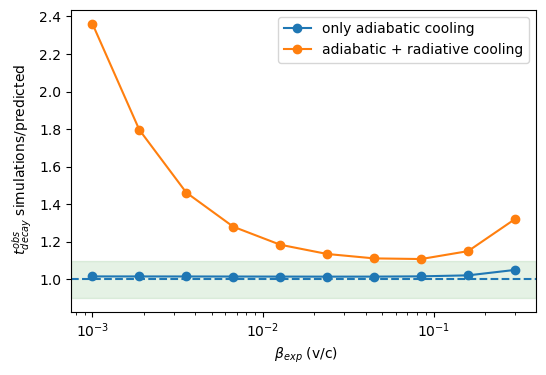

In [34]:
fig_decay=plt.figure(dpi=100)

plt.plot(table_no_synch_cooling['beta_exp'],t_decay_th_no_synch_cooling/table_no_synch_cooling['t_decay_conv'],'-o',label='only adiabatic cooling')

plt.plot(table_cooling['beta_exp'],t_decay_th_cooling/table_cooling['t_decay_conv'],'-o',label='adiabatic + radiative cooling')
plt.axhline(1.0,ls='--')
plt.axhspan(0.9,1.1, alpha=0.1, color='g')
plt.xlabel(r' $\beta_{exp}$ (v/c)')
plt.ylabel(' $\Delta_t^{obs}$/Eq. 25')
plt.xlabel(r' $\beta_{exp}$ (v/c)')
plt.ylabel(' $t^{obs}_{decay}$ simulations/predicted')
plt.semilogx()
plt.legend()
print(np.average(t_decay_th_cooling/table_cooling['t_decay_conv']))

1.20633132638434


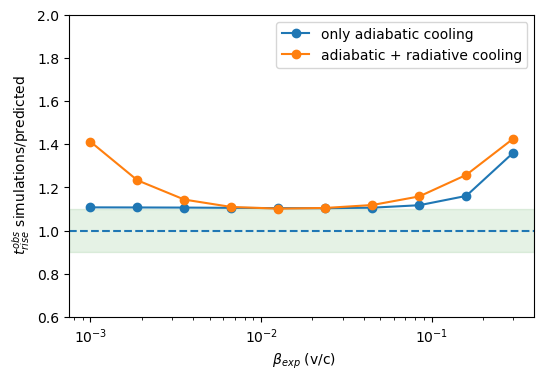

In [35]:
fig_rise=plt.figure(dpi=100)

t_rise_data=table_no_synch_cooling['t_rise_conv']
plt.plot(table_no_synch_cooling['beta_exp'],t_rise_th_no_synch_cooling/t_rise_data,'-o',label='only adiabatic cooling')
t_rise_data=table_cooling['t_rise_conv']
plt.plot(table_cooling['beta_exp'],t_rise_th_cooling/t_rise_data,'-o',label='adiabatic + radiative cooling')
plt.axhline(1.0,ls='--')
plt.axhspan(0.9,1.1, alpha=0.1, color='g')
plt.xlabel(r' $\beta_{exp}$ (v/c)')
plt.ylabel(' $t^{obs}_{rise}$ simulations/predicted')
plt.ylim(0.6,2.0)

plt.semilogx()
plt.legend()
print(np.average(t_rise_th_cooling/t_rise_data))

In [36]:
fig_rise.savefig('Phenomenology_validation/validation_t_rise.pdf',bbox_inches = 'tight',
    pad_inches = 0)

fig_decay.savefig('Phenomenology_validation/validation_t_decay.pdf',bbox_inches = 'tight',
    pad_inches = 0)


fig_delay.savefig('Phenomenology_validation/validation_t_delay.pdf',bbox_inches = 'tight',
    pad_inches = 0)
